In [1]:
import numpy as np
import numpy.typing as npt
from typing import List, Tuple
import matplotlib.pyplot as plt

In [2]:
def BlackScholesSingleStockPath(
    S_0: float, 
    r: float, 
    sigma: float, 
    T: float, 
    N: int, 
    rng: np.random.Generator
):
    delta = T / N
    Z = rng.normal(loc=0, scale=1, size=(N))
    path = np.empty((N + 1), dtype=np.float64)
    path[0] = S_0
    for i in range(N):
        path[i + 1] = path[i] * np.exp((r - 0.5 * np.power(sigma, 2.0)) * delta + sigma * np.sqrt(delta) * Z[i])
    return path

In [33]:
S_0 = 0.05
T = 1.0
N = 1000

r_values = [0.1]
sigma_values = [0.1]

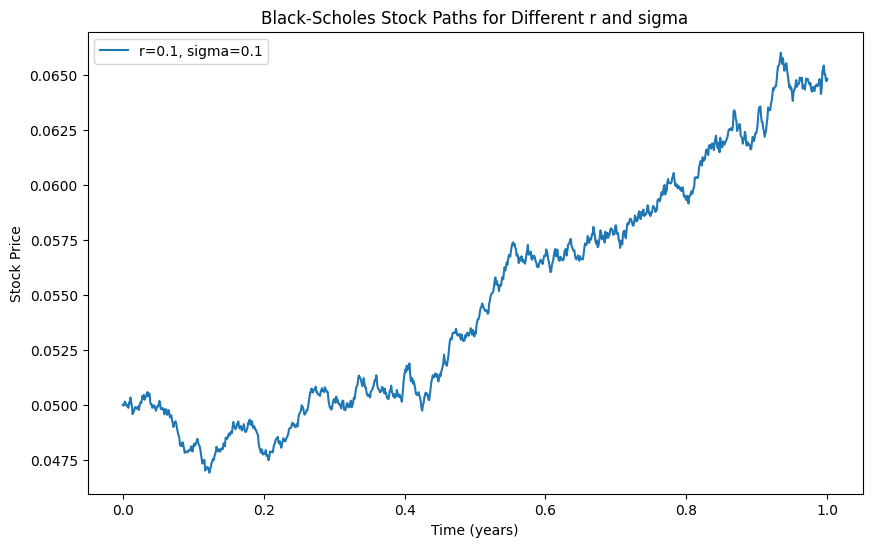

In [34]:
seed = np.random.randint(0, 999_999)
plt.figure(figsize=(10, 6))
for r in r_values:
    for sigma in sigma_values:
        rng = np.random.default_rng(seed)
        path = BlackScholesSingleStockPath(S_0, r, sigma, T, N, rng)
        plt.plot(np.linspace(0, T, N + 1), path, label=f"r={r}, sigma={sigma}")
        
plt.xlabel("Time (years)")
plt.ylabel("Stock Price")
plt.title("Black-Scholes Stock Paths for Different r and sigma")
plt.legend()
plt.show()